# HW 2 - Simple Hold-out Validation

In this notebook I have tested 4 different network architectures on CIFAR10 dataset. The following parts include loading dataset and data preparation. Also train data set has been divided to the train and validation sets with the proportion of 80 and 20.

In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras import layers
from keras.optimizers import SGD , adam
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical  
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
# initial parameters
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
data_size = train_images.shape[0]
valid_size = data_size * 20 / 100
train_size = data_size * 80 / 100
batch_size = 32
epochs = 200

In [5]:
# preparing dataset
train_labels = to_categorical(train_labels, num_classes = len(class_names))
test_labels = to_categorical(test_labels, num_classes = len(class_names))
test_images = test_images.astype('float32') / 255.0
train_images = train_images.astype('float32') / 255.0

In [5]:
# creating validation set
shuffled_indices = np.random.permutation(data_size)
train_set_x = train_images[shuffled_indices]
train_set_y = train_labels[shuffled_indices]

validation_set_x = train_set_x[-valid_size:]
validation_set_y = train_set_y[-valid_size:]

train_set_x = train_set_x[:train_size]
train_set_y = train_set_y[:train_size]

# The First Architecture (Most Simple)

In [6]:
# creating model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total para

In [8]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = sgd)

In [9]:
# training model
history = model.fit(train_set_x, train_set_y, batch_size = batch_size, epochs = epochs, verbose=2, validation_data = (validation_set_x,validation_set_y))

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
 - 6s - loss: 1.6104 - acc: 0.4146 - val_loss: 1.3210 - val_acc: 0.5256
Epoch 2/200
 - 5s - loss: 1.1704 - acc: 0.5849 - val_loss: 1.1670 - val_acc: 0.5932
Epoch 3/200
 - 5s - loss: 1.0246 - acc: 0.6398 - val_loss: 1.1721 - val_acc: 0.5871
Epoch 4/200
 - 5s - loss: 0.9094 - acc: 0.6820 - val_loss: 1.0320 - val_acc: 0.6487
Epoch 5/200
 - 5s - loss: 0.8187 - acc: 0.7117 - val_loss: 1.0555 - val_acc: 0.6476
Epoch 6/200
 - 5s - loss: 0.7355 - acc: 0.7421 - val_loss: 0.9891 - val_acc: 0.6757
Epoch 7/200
 - 5s - loss: 0.6568 - acc: 0.7698 - val_loss: 0.9962 - val_acc: 0.6765
Epoch 8/200
 - 5s - loss: 0.5837 - acc: 0.7923 - val_loss: 1.0597 - val_acc: 0.6626
Epoch 9/200
 - 5s - loss: 0.5216 - acc: 0.8116 - val_loss: 1.1675 - val_acc: 0.6718
Epoch 10/200
 - 5s - loss: 0.4634 - acc: 0.8333 - val_loss: 1.2173 - val_acc: 0.6539
Epoch 11/200
 - 5s - loss: 0.4179 - acc: 0.8509 - val_loss: 1.3238 - val_acc: 0.6596
Epoch 12/200
 - 5s - los

Epoch 97/200
 - 5s - loss: 1.0486 - acc: 0.8176 - val_loss: 3.5580 - val_acc: 0.5704
Epoch 98/200
 - 5s - loss: 1.0780 - acc: 0.8074 - val_loss: 4.3113 - val_acc: 0.5358
Epoch 99/200
 - 5s - loss: 1.0234 - acc: 0.8111 - val_loss: 3.8686 - val_acc: 0.5427
Epoch 100/200
 - 5s - loss: 1.0569 - acc: 0.8058 - val_loss: 3.7162 - val_acc: 0.5690
Epoch 101/200
 - 5s - loss: 1.0162 - acc: 0.8176 - val_loss: 3.8819 - val_acc: 0.5200
Epoch 102/200
 - 5s - loss: 1.1224 - acc: 0.8007 - val_loss: 3.8238 - val_acc: 0.5594
Epoch 103/200
 - 5s - loss: 1.2254 - acc: 0.7723 - val_loss: 3.4751 - val_acc: 0.5609
Epoch 104/200
 - 5s - loss: 1.1679 - acc: 0.7856 - val_loss: 3.5777 - val_acc: 0.5589
Epoch 105/200
 - 5s - loss: 1.1683 - acc: 0.7812 - val_loss: 3.5077 - val_acc: 0.5443
Epoch 106/200
 - 5s - loss: 1.1644 - acc: 0.7742 - val_loss: 3.5127 - val_acc: 0.5453
Epoch 107/200
 - 5s - loss: 1.1317 - acc: 0.7797 - val_loss: 3.3197 - val_acc: 0.5117
Epoch 108/200
 - 5s - loss: 1.1525 - acc: 0.7691 - val_lo

Epoch 193/200
 - 5s - loss: 2.3028 - acc: 0.0975 - val_loss: 2.3034 - val_acc: 0.0984
Epoch 194/200
 - 5s - loss: 2.3028 - acc: 0.1011 - val_loss: 2.3032 - val_acc: 0.1018
Epoch 195/200
 - 5s - loss: 2.3030 - acc: 0.0987 - val_loss: 2.3033 - val_acc: 0.0982
Epoch 196/200
 - 5s - loss: 2.3029 - acc: 0.0995 - val_loss: 2.3038 - val_acc: 0.0982
Epoch 197/200
 - 5s - loss: 2.3030 - acc: 0.0969 - val_loss: 2.3033 - val_acc: 0.1022
Epoch 198/200
 - 5s - loss: 2.3029 - acc: 0.0995 - val_loss: 2.3036 - val_acc: 0.0984
Epoch 199/200
 - 5s - loss: 2.3028 - acc: 0.1024 - val_loss: 2.3034 - val_acc: 0.0983
Epoch 200/200
 - 5s - loss: 2.3029 - acc: 0.0971 - val_loss: 2.3037 - val_acc: 0.1022


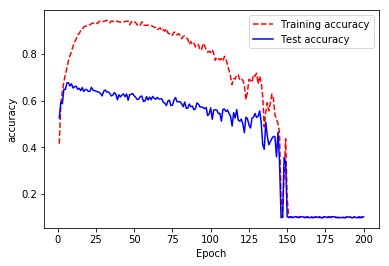

In [10]:
# plot accuracy
training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

epoch_count = range(1, len(training_accuracy) + 1) 

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

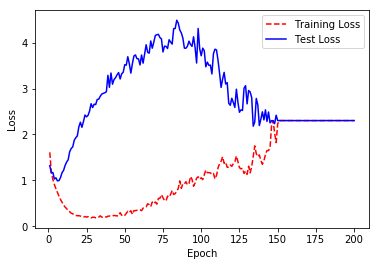

In [11]:
# plot loss
training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1) 

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

It seems to be overfitting at early steps of the training but for the sake of comparision I have set the epochs for all architectures the same. The best accuracy result in this architecture is 0.6765.

# Second Architecture (More Layers)

In [12]:
# creating model
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model2.add(Conv2D(32, (3, 3), activation = 'relu'))
model2.add(Conv2D(64, (3, 3), activation = 'relu', strides = 2))
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(Conv2D(128, (3, 3), activation = 'relu', strides=2))
model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(Flatten())
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax'))

In [13]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
__________

In [14]:
model2.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'rmsprop')

In [16]:
# training model
history2 = model2.fit(train_set_x, train_set_y, batch_size = batch_size, epochs = epochs, verbose=2, validation_data = (validation_set_x,validation_set_y))

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
 - 7s - loss: 0.3373 - acc: 0.9095 - val_loss: 1.7975 - val_acc: 0.6813
Epoch 2/200
 - 7s - loss: 0.3176 - acc: 0.9133 - val_loss: 1.9066 - val_acc: 0.6853
Epoch 3/200
 - 7s - loss: 0.3111 - acc: 0.9172 - val_loss: 1.7099 - val_acc: 0.6426
Epoch 4/200
 - 7s - loss: 0.3226 - acc: 0.9169 - val_loss: 2.2801 - val_acc: 0.6985
Epoch 5/200
 - 7s - loss: 0.3150 - acc: 0.9181 - val_loss: 1.9735 - val_acc: 0.6541
Epoch 6/200
 - 7s - loss: 0.3047 - acc: 0.9215 - val_loss: 1.8931 - val_acc: 0.6701
Epoch 7/200
 - 7s - loss: 0.3138 - acc: 0.9209 - val_loss: 2.2135 - val_acc: 0.6946
Epoch 8/200
 - 7s - loss: 0.3060 - acc: 0.9222 - val_loss: 1.9221 - val_acc: 0.7005
Epoch 9/200
 - 7s - loss: 0.2894 - acc: 0.9251 - val_loss: 1.9259 - val_acc: 0.6771
Epoch 10/200
 - 7s - loss: 0.2961 - acc: 0.9255 - val_loss: 2.0752 - val_acc: 0.7035
Epoch 11/200
 - 7s - loss: 0.3157 - acc: 0.9247 - val_loss: 2.2916 - val_acc: 0.6687
Epoch 12/200
 - 7s - los

Epoch 97/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 98/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 99/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 100/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 101/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 102/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 103/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 104/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 105/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 106/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 107/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 108/200
 - 7s - loss: 14.4543

 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 191/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 192/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 193/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 194/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 195/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 196/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 197/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 198/200
 - 8s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 199/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007
Epoch 200/200
 - 7s - loss: 14.4543 - acc: 0.1032 - val_loss: 14.4950 - val_acc: 0.1007


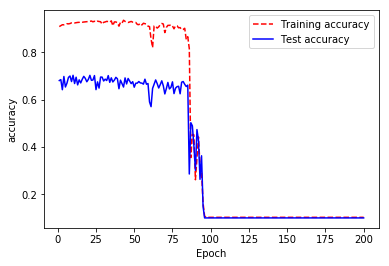

In [17]:
# plot accuracy
training_accuracy = history2.history['acc']
test_accuracy = history2.history['val_acc']

epoch_count = range(1, len(training_accuracy) + 1) 

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

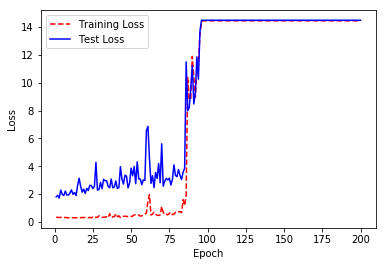

In [18]:
# plot loss
training_loss = history2.history['loss']
test_loss = history2.history['val_loss']

epoch_count = range(1, len(training_loss) + 1) 

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

The best Validation Accuracy : 0.7022

# The Third Architecture (Drop-out)

In [19]:
# creating model
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model3.add(Conv2D(32, (3, 3), activation = 'relu'))
model3.add(Conv2D(64, (3, 3), activation = 'relu', strides = 2))
model3.add(Dropout(0.5))
model3.add(Conv2D(64, (3, 3), activation = 'relu'))
model3.add(Conv2D(128, (3, 3), activation = 'relu', strides=2))
model3.add(Conv2D(128, (3, 3), activation = 'relu'))
model3.add(Flatten())
model3.add(Dropout(0.5))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(10, activation = 'softmax'))

In [20]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 128)         147584    
__________

In [21]:
model3.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'rmsprop')

In [22]:
# training model
history3 = model3.fit(train_set_x, train_set_y, batch_size = batch_size, epochs = epochs, verbose=2, validation_data = (validation_set_x,validation_set_y))

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
 - 8s - loss: 1.7502 - acc: 0.3604 - val_loss: 1.5646 - val_acc: 0.4391
Epoch 2/200
 - 8s - loss: 1.3985 - acc: 0.5014 - val_loss: 1.2558 - val_acc: 0.5477
Epoch 3/200
 - 8s - loss: 1.2338 - acc: 0.5607 - val_loss: 1.1580 - val_acc: 0.5954
Epoch 4/200
 - 8s - loss: 1.1318 - acc: 0.6009 - val_loss: 0.9777 - val_acc: 0.6558
Epoch 5/200
 - 8s - loss: 1.0479 - acc: 0.6349 - val_loss: 0.9456 - val_acc: 0.6661
Epoch 6/200
 - 8s - loss: 1.0056 - acc: 0.6549 - val_loss: 1.0969 - val_acc: 0.6303
Epoch 7/200
 - 8s - loss: 1.0005 - acc: 0.6608 - val_loss: 0.9748 - val_acc: 0.6703
Epoch 8/200
 - 8s - loss: 0.9929 - acc: 0.6635 - val_loss: 0.9262 - val_acc: 0.6879
Epoch 9/200
 - 8s - loss: 1.0089 - acc: 0.6632 - val_loss: 0.9790 - val_acc: 0.6778
Epoch 10/200
 - 8s - loss: 1.0163 - acc: 0.6613 - val_loss: 1.1310 - val_acc: 0.6193
Epoch 11/200
 - 8s - loss: 1.0317 - acc: 0.6542 - val_loss: 1.0906 - val_acc: 0.6245
Epoch 12/200
 - 8s - los

Epoch 97/200
 - 8s - loss: 14.4612 - acc: 0.1028 - val_loss: 14.3967 - val_acc: 0.1068
Epoch 98/200
 - 8s - loss: 14.4724 - acc: 0.1021 - val_loss: 14.3967 - val_acc: 0.1068
Epoch 99/200
 - 8s - loss: 14.4591 - acc: 0.1029 - val_loss: 14.3967 - val_acc: 0.1068
Epoch 100/200
 - 8s - loss: 14.4559 - acc: 0.1031 - val_loss: 14.3967 - val_acc: 0.1068
Epoch 101/200
 - 8s - loss: 14.4539 - acc: 0.1033 - val_loss: 14.3967 - val_acc: 0.1068
Epoch 102/200
 - 8s - loss: 14.4608 - acc: 0.1028 - val_loss: 14.3967 - val_acc: 0.1068
Epoch 103/200
 - 8s - loss: 14.4595 - acc: 0.1029 - val_loss: 14.3967 - val_acc: 0.1068
Epoch 104/200
 - 8s - loss: 14.4591 - acc: 0.1029 - val_loss: 14.3967 - val_acc: 0.1068
Epoch 105/200
 - 8s - loss: 14.4503 - acc: 0.1035 - val_loss: 14.3967 - val_acc: 0.1068
Epoch 106/200
 - 8s - loss: 14.4620 - acc: 0.1027 - val_loss: 14.3967 - val_acc: 0.1068
Epoch 107/200
 - 8s - loss: 14.4587 - acc: 0.1029 - val_loss: 14.3967 - val_acc: 0.1068
Epoch 108/200
 - 8s - loss: 14.4499

 - 8s - loss: 14.5095 - acc: 0.0998 - val_loss: 14.4708 - val_acc: 0.1022
Epoch 191/200
 - 8s - loss: 14.5087 - acc: 0.0999 - val_loss: 14.4708 - val_acc: 0.1022
Epoch 192/200
 - 8s - loss: 14.5095 - acc: 0.0998 - val_loss: 14.4708 - val_acc: 0.1022
Epoch 193/200
 - 8s - loss: 14.5119 - acc: 0.0997 - val_loss: 14.4708 - val_acc: 0.1022
Epoch 194/200
 - 8s - loss: 14.5079 - acc: 0.0999 - val_loss: 14.4708 - val_acc: 0.1022
Epoch 195/200
 - 8s - loss: 14.5083 - acc: 0.0999 - val_loss: 14.4708 - val_acc: 0.1022
Epoch 196/200
 - 8s - loss: 14.5071 - acc: 0.1000 - val_loss: 14.4708 - val_acc: 0.1022
Epoch 197/200
 - 8s - loss: 14.5103 - acc: 0.0998 - val_loss: 14.4708 - val_acc: 0.1022
Epoch 198/200
 - 8s - loss: 14.5103 - acc: 0.0998 - val_loss: 14.4708 - val_acc: 0.1022
Epoch 199/200
 - 8s - loss: 14.5079 - acc: 0.0999 - val_loss: 14.4708 - val_acc: 0.1022
Epoch 200/200
 - 8s - loss: 14.5055 - acc: 0.1001 - val_loss: 14.4708 - val_acc: 0.1022


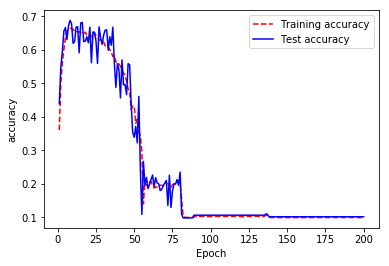

In [23]:
# plot accuracy
training_accuracy = history3.history['acc']
test_accuracy = history3.history['val_acc']

epoch_count = range(1, len(training_accuracy) + 1) 

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

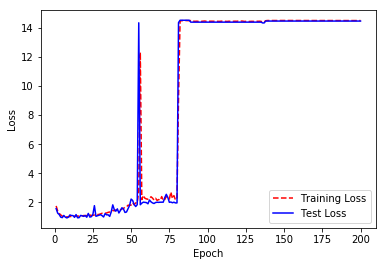

In [24]:
# plot loss
training_loss = history3.history['loss']
test_loss = history3.history['val_loss']

epoch_count = range(1, len(training_loss) + 1) 

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

The resuls show that with adding drop-out, the overfitting problem is solved to some extent, but the validation accuracy is not better than other architectures, so in next step I want to add more regularizations to this architecture. The best validation accuracy is 0.6879.

# The Fourth Architecture (Most Complex)

In [25]:
# creating model
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model4.add(Conv2D(32, (3, 3), activation = 'relu'))
model4.add(Conv2D(64, (3, 3), activation = 'relu', strides = 2))
model4.add(Dropout(0.5))
model4.add(Conv2D(64, (3, 3), activation = 'relu'))
model4.add(Conv2D(128, (3, 3), activation = 'relu', strides=2))
model4.add(Conv2D(128, (3, 3), activation = 'relu'))
model4.add(Flatten())
model4.add(Dropout(0.5))
model4.add(Dense(64, activation = 'relu'))
model4.add(layers.normalization.BatchNormalization())
model4.add(Dense(10, activation = 'softmax'))

In [26]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 128)         147584    
__________

In [27]:
model4.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'rmsprop')

In [28]:
# Data Augmentation
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')   

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(train_set_x, train_set_y, batch_size=32)
validation_generator = validation_datagen.flow(validation_set_x, validation_set_y, batch_size=32)

In [29]:
history4 = model4.fit_generator(train_generator,validation_data = validation_generator, validation_steps=len(train_set_x) / 32, steps_per_epoch=len(train_set_x) / 32, epochs = epochs, verbose=2)

Epoch 1/200
 - 18s - loss: 1.9579 - acc: 0.2636 - val_loss: 2.0622 - val_acc: 0.3308
Epoch 2/200
 - 17s - loss: 1.7387 - acc: 0.3618 - val_loss: 1.7039 - val_acc: 0.4125
Epoch 3/200
 - 17s - loss: 1.6248 - acc: 0.4070 - val_loss: 2.4118 - val_acc: 0.2758
Epoch 4/200
 - 18s - loss: 1.5396 - acc: 0.4404 - val_loss: 1.4538 - val_acc: 0.4923
Epoch 5/200
 - 17s - loss: 1.4692 - acc: 0.4684 - val_loss: 1.2526 - val_acc: 0.5535
Epoch 6/200
 - 17s - loss: 1.4187 - acc: 0.4908 - val_loss: 1.2100 - val_acc: 0.5684
Epoch 7/200
 - 17s - loss: 1.3812 - acc: 0.5054 - val_loss: 1.3195 - val_acc: 0.5309
Epoch 8/200
 - 17s - loss: 1.3525 - acc: 0.5173 - val_loss: 1.2241 - val_acc: 0.5798
Epoch 9/200
 - 17s - loss: 1.3205 - acc: 0.5302 - val_loss: 1.3202 - val_acc: 0.5412
Epoch 10/200
 - 17s - loss: 1.2928 - acc: 0.5404 - val_loss: 1.0241 - val_acc: 0.6379
Epoch 11/200
 - 17s - loss: 1.2730 - acc: 0.5475 - val_loss: 1.1626 - val_acc: 0.5990
Epoch 12/200
 - 17s - loss: 1.2499 - acc: 0.5546 - val_loss: 1.

Epoch 97/200
 - 17s - loss: 0.9005 - acc: 0.6897 - val_loss: 0.7248 - val_acc: 0.7553
Epoch 98/200
 - 18s - loss: 0.8973 - acc: 0.6913 - val_loss: 0.6741 - val_acc: 0.7675
Epoch 99/200
 - 19s - loss: 0.8967 - acc: 0.6926 - val_loss: 0.7887 - val_acc: 0.7354
Epoch 100/200
 - 19s - loss: 0.8963 - acc: 0.6923 - val_loss: 0.6758 - val_acc: 0.7754
Epoch 101/200
 - 18s - loss: 0.8990 - acc: 0.6936 - val_loss: 0.7520 - val_acc: 0.7431
Epoch 102/200
 - 17s - loss: 0.8925 - acc: 0.6938 - val_loss: 0.7289 - val_acc: 0.7570
Epoch 103/200
 - 18s - loss: 0.8981 - acc: 0.6939 - val_loss: 0.6637 - val_acc: 0.7790
Epoch 104/200
 - 18s - loss: 0.8867 - acc: 0.6969 - val_loss: 0.7547 - val_acc: 0.7460
Epoch 105/200
 - 18s - loss: 0.8811 - acc: 0.6979 - val_loss: 0.6818 - val_acc: 0.7666
Epoch 106/200
 - 18s - loss: 0.8790 - acc: 0.6969 - val_loss: 0.6932 - val_acc: 0.7640
Epoch 107/200
 - 17s - loss: 0.8885 - acc: 0.6948 - val_loss: 0.7845 - val_acc: 0.7427
Epoch 108/200
 - 17s - loss: 0.8891 - acc: 0.6

Epoch 192/200
 - 17s - loss: 0.8266 - acc: 0.7180 - val_loss: 0.6372 - val_acc: 0.7857
Epoch 193/200
 - 17s - loss: 0.8340 - acc: 0.7167 - val_loss: 0.6135 - val_acc: 0.7888
Epoch 194/200
 - 17s - loss: 0.8312 - acc: 0.7134 - val_loss: 0.5946 - val_acc: 0.7958
Epoch 195/200
 - 17s - loss: 0.8266 - acc: 0.7178 - val_loss: 0.6564 - val_acc: 0.7827
Epoch 196/200
 - 17s - loss: 0.8287 - acc: 0.7164 - val_loss: 0.6318 - val_acc: 0.7892
Epoch 197/200
 - 17s - loss: 0.8309 - acc: 0.7143 - val_loss: 0.6179 - val_acc: 0.7878
Epoch 198/200
 - 17s - loss: 0.8323 - acc: 0.7137 - val_loss: 0.5823 - val_acc: 0.7996
Epoch 199/200
 - 17s - loss: 0.8414 - acc: 0.7126 - val_loss: 0.6067 - val_acc: 0.7942
Epoch 200/200
 - 17s - loss: 0.8272 - acc: 0.7174 - val_loss: 0.6168 - val_acc: 0.7889


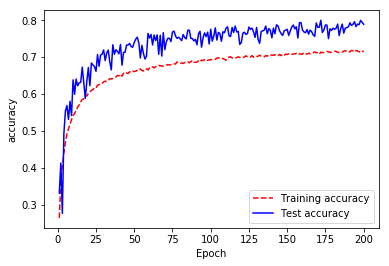

In [30]:
# plot accuracy
training_accuracy = history4.history['acc']
test_accuracy = history4.history['val_acc']

epoch_count = range(1, len(training_accuracy) + 1) 

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

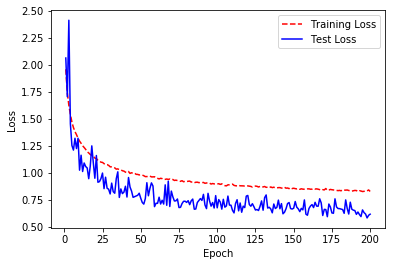

In [31]:
# plot loss
training_loss = history4.history['loss']
test_loss = history4.history['val_loss']

epoch_count = range(1, len(training_loss) + 1) 

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

As shown in the picture adding data augmentation, drop-out and batch normalization to the networks helps to prevent the overfitting problem. The best validation accuracy acquired in this network is 0.7998. 

# Comparing Four Architectures

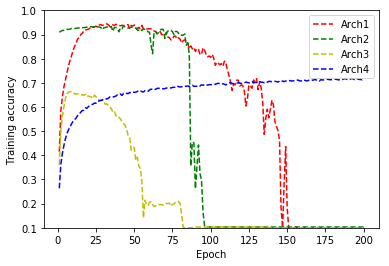

In [32]:
# plot accuracy
training_accuracy1 = history.history['acc']
test_accuracy1 = history.history['val_acc']

training_accuracy2 = history2.history['acc']
test_accuracy2 = history2.history['val_acc']

training_accuracy3 = history3.history['acc']
test_accuracy3 = history3.history['val_acc']

training_accuracy4 = history4.history['acc']
test_accuracy4 = history4.history['val_acc']

epoch_count = range(1, len(training_accuracy1) + 1) 

plt.plot(epoch_count, training_accuracy1, 'r--')
plt.plot(epoch_count, training_accuracy2, 'g--')
plt.plot(epoch_count, training_accuracy3, 'y--')
plt.plot(epoch_count, training_accuracy4, 'b--')
plt.legend(['Arch1', 'Arch2', 'Arch3', 'Arch4'])
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.ylim(0.1,1)
plt.show()

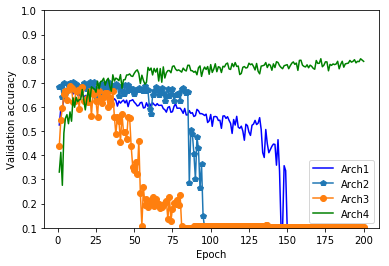

In [33]:
plt.plot(epoch_count, test_accuracy1, 'b-')
plt.plot(epoch_count, test_accuracy2, 'p-')
plt.plot(epoch_count, test_accuracy3, 'o-')
plt.plot(epoch_count, test_accuracy4, 'g-')
plt.legend(['Arch1', 'Arch2', 'Arch3', 'Arch4'])
plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')
plt.ylim(0.1,1)
plt.show()

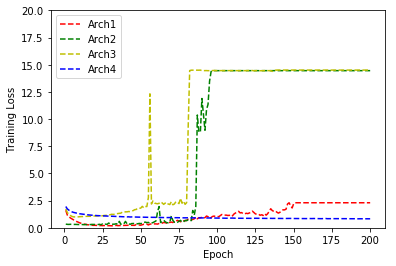

In [40]:
# plot loss
training_loss1 = history.history['loss']
test_loss1 = history.history['val_loss']

training_loss2 = history2.history['loss']
test_loss2 = history2.history['val_loss']

training_loss3 = history3.history['loss']
test_loss3 = history3.history['val_loss']

training_loss4 = history4.history['loss']
test_loss4 = history4.history['val_loss']

epoch_count = range(1, len(training_loss1) + 1) 

plt.plot(epoch_count, training_loss1, 'r--')
plt.plot(epoch_count, training_loss2, 'g--')
plt.plot(epoch_count, training_loss3, 'y--')
plt.plot(epoch_count, training_loss4, 'b--')
plt.legend(['Arch1', 'Arch2', 'Arch3', 'Arch4'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.ylim(0.0,20.0)
plt.show()

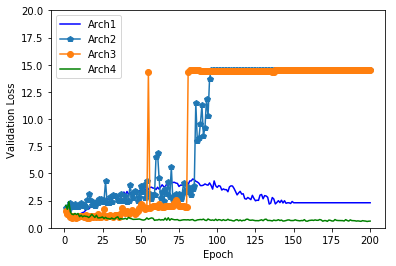

In [41]:
plt.plot(epoch_count, test_loss1, 'b-')
plt.plot(epoch_count, test_loss2, 'p-')
plt.plot(epoch_count, test_loss3, 'o-')
plt.plot(epoch_count, test_loss4, 'g-')
plt.legend(['Arch1', 'Arch2', 'Arch3', 'Arch4'])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.ylim(0.0,20.0)
plt.show()

# Evaluating The Winning Architecture

In [7]:
# Training Winner model with
model_w = Sequential()
model_w.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model_w.add(Conv2D(32, (3, 3), activation = 'relu'))
model_w.add(Conv2D(64, (3, 3), activation = 'relu', strides = 2))
model_w.add(Dropout(0.5))
model_w.add(Conv2D(64, (3, 3), activation = 'relu'))
model_w.add(Conv2D(128, (3, 3), activation = 'relu', strides=2))
model_w.add(Conv2D(128, (3, 3), activation = 'relu'))
model_w.add(Flatten())
model_w.add(Dropout(0.5))
model_w.add(Dense(64, activation = 'relu'))
model_w.add(layers.normalization.BatchNormalization())
model_w.add(Dense(10, activation = 'softmax'))

model_w.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'rmsprop')

# Data Augmentation
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')   

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)

history_w = model_w.fit_generator(train_generator, steps_per_epoch=len(train_images) / 32 ,epochs = epochs, verbose=2)

Epoch 1/200
 - 19s - loss: 1.9338 - acc: 0.2767
Epoch 2/200
 - 18s - loss: 1.7022 - acc: 0.3754
Epoch 3/200
 - 18s - loss: 1.5777 - acc: 0.4291
Epoch 4/200
 - 18s - loss: 1.4882 - acc: 0.4615
Epoch 5/200
 - 18s - loss: 1.4274 - acc: 0.4896
Epoch 6/200
 - 18s - loss: 1.3709 - acc: 0.5103
Epoch 7/200
 - 18s - loss: 1.3306 - acc: 0.5248
Epoch 8/200
 - 18s - loss: 1.3009 - acc: 0.5369
Epoch 9/200
 - 18s - loss: 1.2686 - acc: 0.5493
Epoch 10/200
 - 18s - loss: 1.2414 - acc: 0.5623
Epoch 11/200
 - 18s - loss: 1.2249 - acc: 0.5677
Epoch 12/200
 - 18s - loss: 1.1931 - acc: 0.5816
Epoch 13/200
 - 18s - loss: 1.1818 - acc: 0.5857
Epoch 14/200
 - 18s - loss: 1.1657 - acc: 0.5921
Epoch 15/200
 - 18s - loss: 1.1511 - acc: 0.5957
Epoch 16/200
 - 18s - loss: 1.1334 - acc: 0.6039
Epoch 17/200
 - 18s - loss: 1.1284 - acc: 0.6063
Epoch 18/200
 - 18s - loss: 1.1075 - acc: 0.6128
Epoch 19/200
 - 18s - loss: 1.0997 - acc: 0.6176
Epoch 20/200
 - 18s - loss: 1.0972 - acc: 0.6198
Epoch 21/200
 - 18s - loss: 1

 - 18s - loss: 0.8118 - acc: 0.7246
Epoch 168/200
 - 18s - loss: 0.8126 - acc: 0.7252
Epoch 169/200
 - 18s - loss: 0.8095 - acc: 0.7238
Epoch 170/200
 - 18s - loss: 0.8056 - acc: 0.7240
Epoch 171/200
 - 18s - loss: 0.8093 - acc: 0.7250
Epoch 172/200
 - 18s - loss: 0.8073 - acc: 0.7255
Epoch 173/200
 - 18s - loss: 0.8096 - acc: 0.7240
Epoch 174/200
 - 18s - loss: 0.8056 - acc: 0.7254
Epoch 175/200
 - 18s - loss: 0.8023 - acc: 0.7264
Epoch 176/200
 - 18s - loss: 0.8091 - acc: 0.7259
Epoch 177/200
 - 18s - loss: 0.8072 - acc: 0.7264
Epoch 178/200
 - 18s - loss: 0.8005 - acc: 0.7241
Epoch 179/200
 - 18s - loss: 0.7980 - acc: 0.7293
Epoch 180/200
 - 18s - loss: 0.8093 - acc: 0.7244
Epoch 181/200
 - 18s - loss: 0.8044 - acc: 0.7266
Epoch 182/200
 - 18s - loss: 0.8075 - acc: 0.7255
Epoch 183/200
 - 18s - loss: 0.8031 - acc: 0.7259
Epoch 184/200
 - 18s - loss: 0.8028 - acc: 0.7278
Epoch 185/200
 - 18s - loss: 0.8004 - acc: 0.7260
Epoch 186/200
 - 18s - loss: 0.8073 - acc: 0.7253
Epoch 187/200


In [8]:
score = model_w.evaluate(test_images, test_labels, batch_size=128, verbose=0)

In [9]:
model_w.metrics_names

['loss', 'acc']

In [10]:
score

[0.5725877911567688, 0.806]